# Overview and analysis of AirBnB listings in Barcelona
In this project, we explore Airbnb listings in Barcelona, a city renowned for its tourism. With millions of annual visitors, Barcelona's popularity as a tourist destination significantly influences its hospitality sector. Airbnb, a major player in this landscape, shapes the city's lodging experience. This analysis focuses on key statistics and trends, aiming to reveal insights into the distribution, pricing dynamics, and trends of Airbnb listings across Barcelona's neighborhoods. Through data exploration, we aim to uncover patterns that provide a deeper understanding of the evolving Airbnb market in this vibrant Mediterranean city.

![Barcelona](https://media.traveler.es/photos/63838947050e0f92cd80c982/16:9/w_2560%2Cc_limit/GettyImages-1392907424.jpg)

## Structure of the notebook
1. Loading and exploring dataset
2. Cleaning dataset
3. Business analysis and visualization
4. Hypothesis testing
5. Data preprocessing
6. Prediction of listing price based on other variables

## 1. Loading and exploring dataset

In [82]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

pd.set_option('display.float_format', '{:.2f}'.format)

In [83]:
# Loading dataset
data = pd.read_csv('data/cleaned/listings_cleaned.csv', parse_dates=['host_since', 'first_review'])

# Since we have 75 columns, we want pandas to display all of them
pd.set_option('display.max_columns', None)

# Exploring first 5 rows
data.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,first_review,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,71615,2010-01-19,within an hour,0.97,0.90,f,t,t,Eixample,Entire home/apt,8,2.00,3.00,6.00,202.00,1,1125,t,4,2013-05-27,4.30,t,30,0.30
1,90417,2010-03-09,within an hour,1.00,0.94,t,t,t,Sant Marti,Entire home/apt,5,2.00,3.00,4.00,255.00,3,300,t,16,2011-03-15,4.77,f,2,0.48
2,567180,2011-05-08,within a few hours,0.88,0.98,f,t,f,Eixample,Entire home/apt,8,2.00,3.00,6.00,331.00,2,30,f,0,2011-08-09,4.55,f,19,0.33
3,135703,2010-05-31,within an hour,1.00,1.00,f,t,t,Gracia,Entire home/apt,6,1.50,2.00,3.00,171.00,21,31,t,6,2011-07-17,4.46,t,3,0.64
4,567180,2011-05-08,within a few hours,0.88,0.98,f,t,f,Eixample,Entire home/apt,8,2.50,3.00,5.00,333.00,2,28,f,0,2011-09-13,4.56,f,19,0.34


In [84]:
# Checking the shape of the dataframe

data.shape

(11731, 24)

In [85]:
# Checking dataframe information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11731 entries, 0 to 11730
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         11731 non-null  int64         
 1   host_since                      11731 non-null  datetime64[ns]
 2   host_response_time              11731 non-null  object        
 3   host_response_rate              11731 non-null  float64       
 4   host_acceptance_rate            11731 non-null  float64       
 5   host_is_superhost               11731 non-null  object        
 6   host_has_profile_pic            11731 non-null  object        
 7   host_identity_verified          11731 non-null  object        
 8   neighbourhood_group_cleansed    11731 non-null  object        
 9   room_type                       11731 non-null  object        
 10  accommodates                    11731 non-null  int64         
 11  ba

## 3. Business analysis and visualization

We are going to explore the data with our main goal in mind, which is determining the variables driving the prices of the listings:
- Distribution of our target variable
- Aggregations and filterings to carry out different types of analysis mixing the pricing variable with other categorical variables
- Visualization of relevant numerical and categorical variables
- Correlation analysis

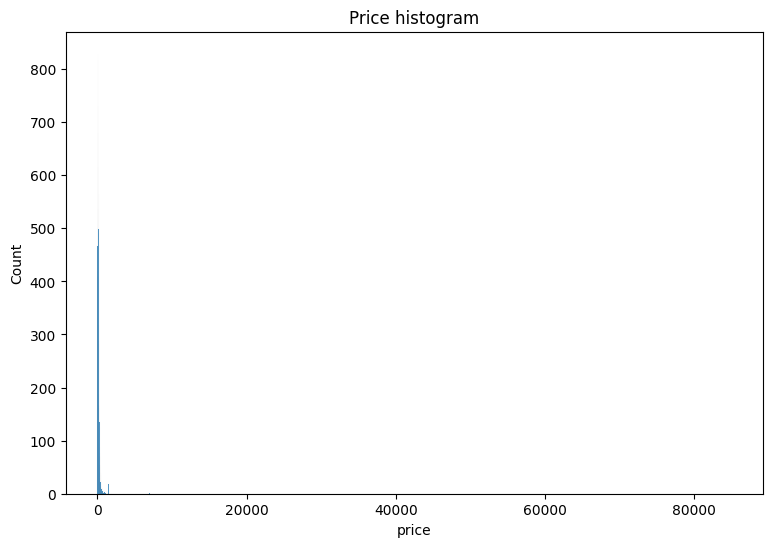

In [86]:
# Exploring the distribution of the price column

plt.subplots(figsize=(9, 6))
sns.histplot(data['price'])
plt.title('Price histogram')
plt.show()

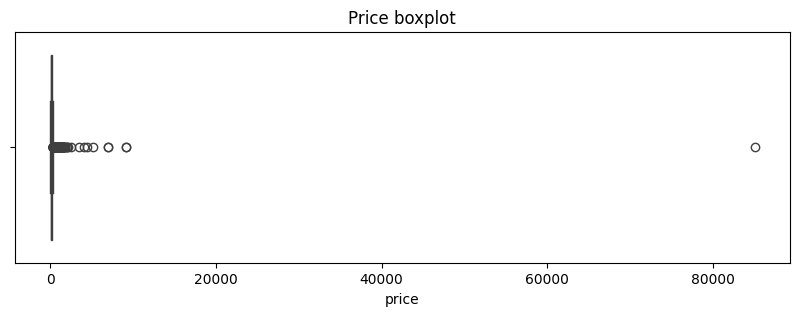

In [87]:
# Something is odd, let's try to identify extreme values with a boxplot

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data['price'])
plt.title('Price boxplot')
plt.show()

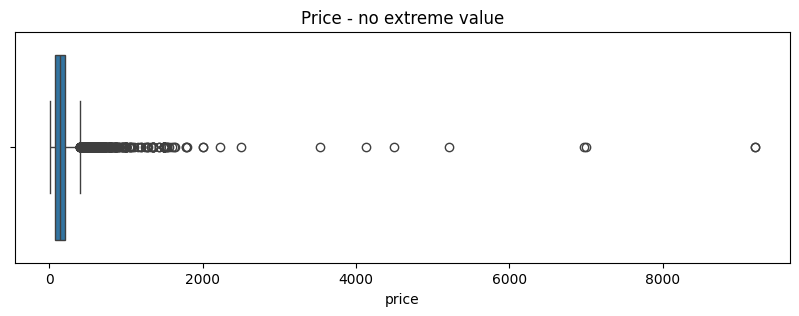

In [88]:
# We can see there is an extreme value, which after further investigation turns out to be an error in a listing that has since been removed, let's check it out again after removing that record

data_filtered = data[data['price'] < 80000]

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data_filtered['price'])
plt.title('Price - no extreme value')
plt.show()

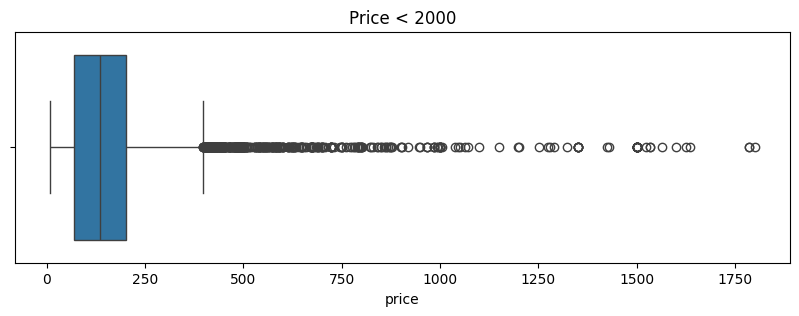

In [89]:
# This looks way better, but we still have some outliers, let's play with the filter to identify a good cutoff for our price

# Filter out records with price higher than 2000
data_filtered = data[data['price'] < 2000]

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data_filtered['price'])
plt.title('Price < 2000')
plt.show()

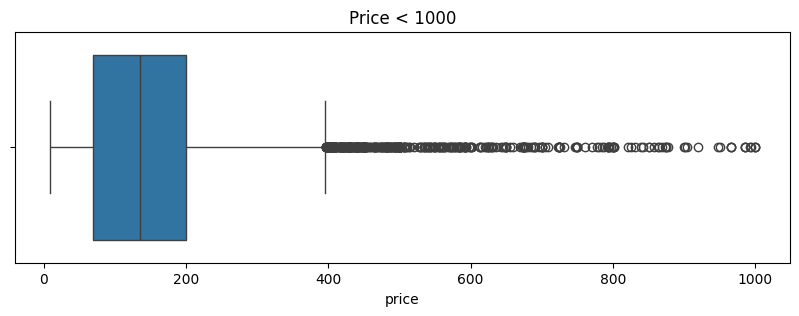

In [90]:
# We can still see some scattered values at the end of the right tail, let's filter out records with price higher than 1000
data_filtered = data[data['price'] < 1000]

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data_filtered['price'])
plt.title('Price < 1000')
plt.show()

In [91]:
# The values are much closer to each other, let's find out how many rows we have lost in the process

print(f'Initial number of rows: {data.shape[0]}')
print(f'Final number of rows: {data_filtered.shape[0]}')

Initial number of rows: 11731
Final number of rows: 11664


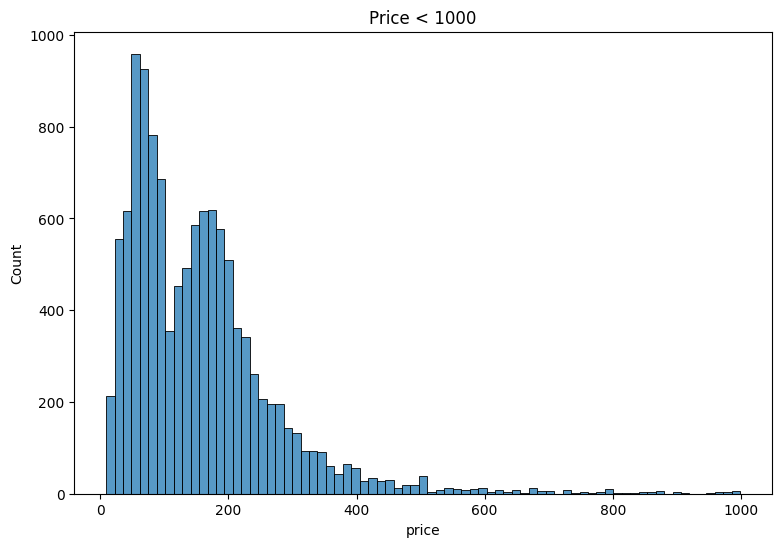

In [92]:
# Let's see the histogram of price now

plt.subplots(figsize=(9, 6))
sns.histplot(data_filtered['price'], bins=75)
plt.title('Price < 1000')
plt.show()

In [93]:
# We are mostly going to consider data_filtered for our analysis, since this way we get rid of extreme values that can distort our statistics, correlation metrics and future predictions, but let's see where most of the higher priced listings were placed

data[data['price'] >= 1000].groupby('neighbourhood_group_cleansed').size().sort_values(ascending=False)

neighbourhood_group_cleansed
Eixample               22
Ciutat Vella           11
Sant Marti             10
Gracia                  9
Sarria-Sant Gervasi     8
Sants-Montjuic          4
Horta-Guinardo          2
Nou Barris              1
dtype: int64

#### Neighbourhood centered analysis

In [94]:
# Overview of price and reviews by neighbourhood

neighbourhood_pivot = round(pd.pivot_table(data_filtered, index='neighbourhood_group_cleansed', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

neighbourhood_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

neighbourhood_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
neighbourhood_group_cleansed,,,,,,,
Ciutat Vella,2544,999.00,133.03,16.00,5.00,4.54,0.00
Eixample,4374,999.00,188.53,10.00,5.00,4.58,0.00
Gracia,1033,992.00,150.84,13.00,5.00,4.54,0.00
Horta-Guinardo,336,600.00,89.94,15.00,5.00,4.51,1.00
Les Corts,224,535.00,139.89,21.00,5.00,4.59,2.50
Nou Barris,107,300.00,60.27,15.00,5.00,4.61,1.00
Sant Andreu,136,263.00,84.59,15.00,5.00,4.55,0.00
Sant Marti,1091,840.00,151.20,9.00,5.00,4.57,0.00
Sants-Montjuic,1268,966.00,122.79,14.00,5.00,4.54,1.00


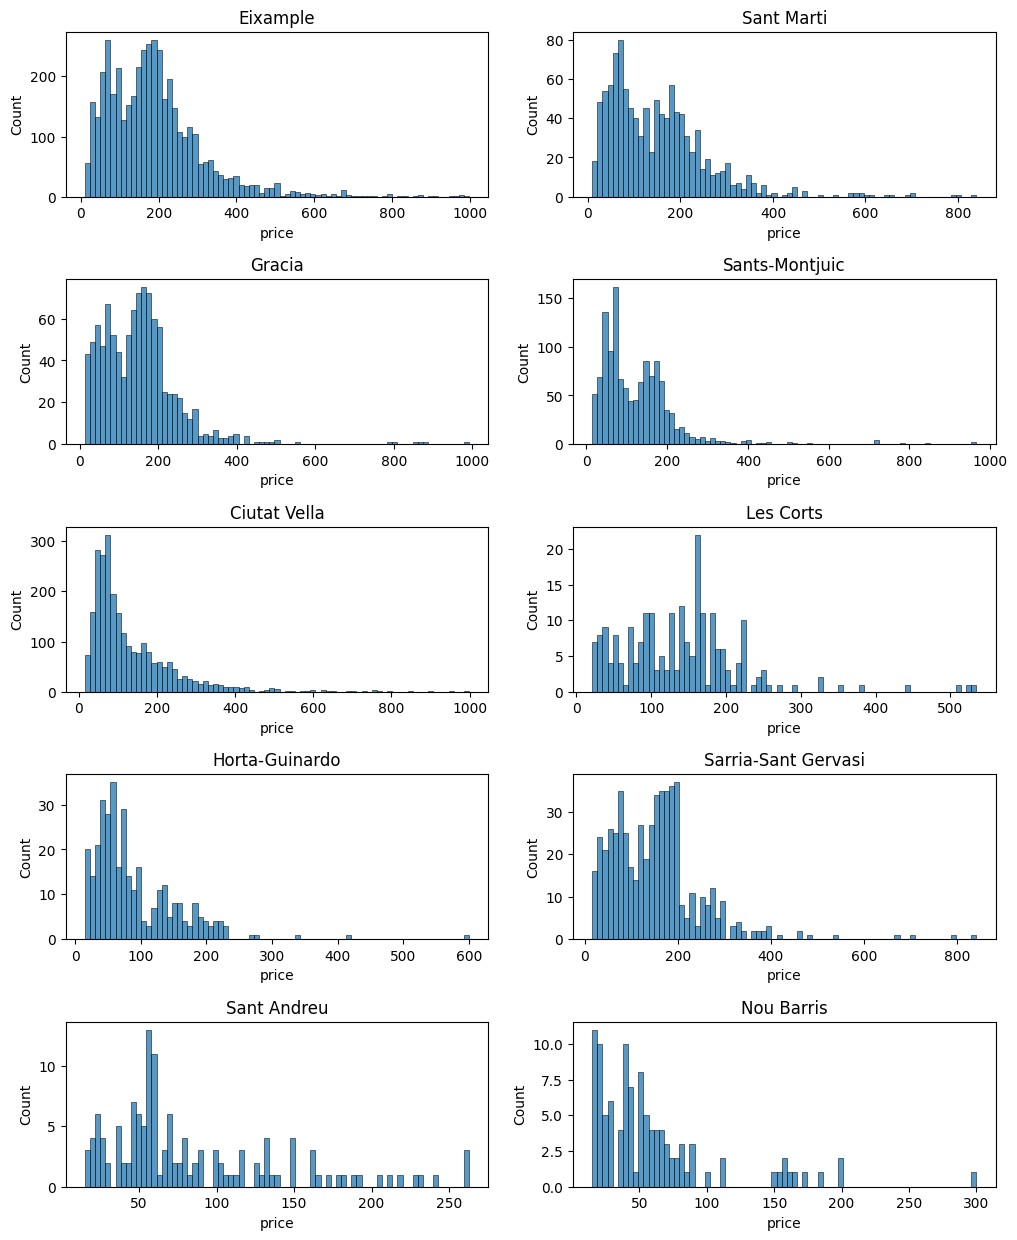

In [95]:
# Histograms of the price by neighbourhood

# Creating list with neighbourhood categories
neighbourhoods = [x for x in data['neighbourhood_group_cleansed'].unique()]

# Defining function to plot histograms
def plot_histograms(df, col_filter, col_plot, categories, bins=75, figsize=(12, 15), sharex=False, sharey=False):
    
    """
    Plot Seaborn histograms in a grid for different categories.
    Inputs:
    - df: DataFrame containing the data
    - col_filter: Column in the DataFrame for which the category filter will be done
    - col_plot: Column in the DataFrame for which histograms will be plotted
    - categories: List of unique values in the column for which histograms will be plotted
    - bins: Number of bins for histograms (default is 75)
    - figsize: size of the figure (default is 12, 25)
    """
    
    num_categories = len(categories)

    if num_categories == 2:
        fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=sharex, sharey=sharey)
    else:
        num_rows = num_categories // 2
        num_cols = 2 if num_categories % 2 == 0 else 1

        fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=sharex, sharey=sharey)
        fig.subplots_adjust(hspace=0.5)

    for i, category in enumerate(categories):
        if num_categories == 2:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i])
            axes[i].set_title(category)
        else:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i // 2, i % 2])
            axes[i // 2, i % 2].set_title(category)

    plt.show()

plot_histograms(df=data_filtered, col_filter='neighbourhood_group_cleansed', col_plot='price', categories=neighbourhoods)

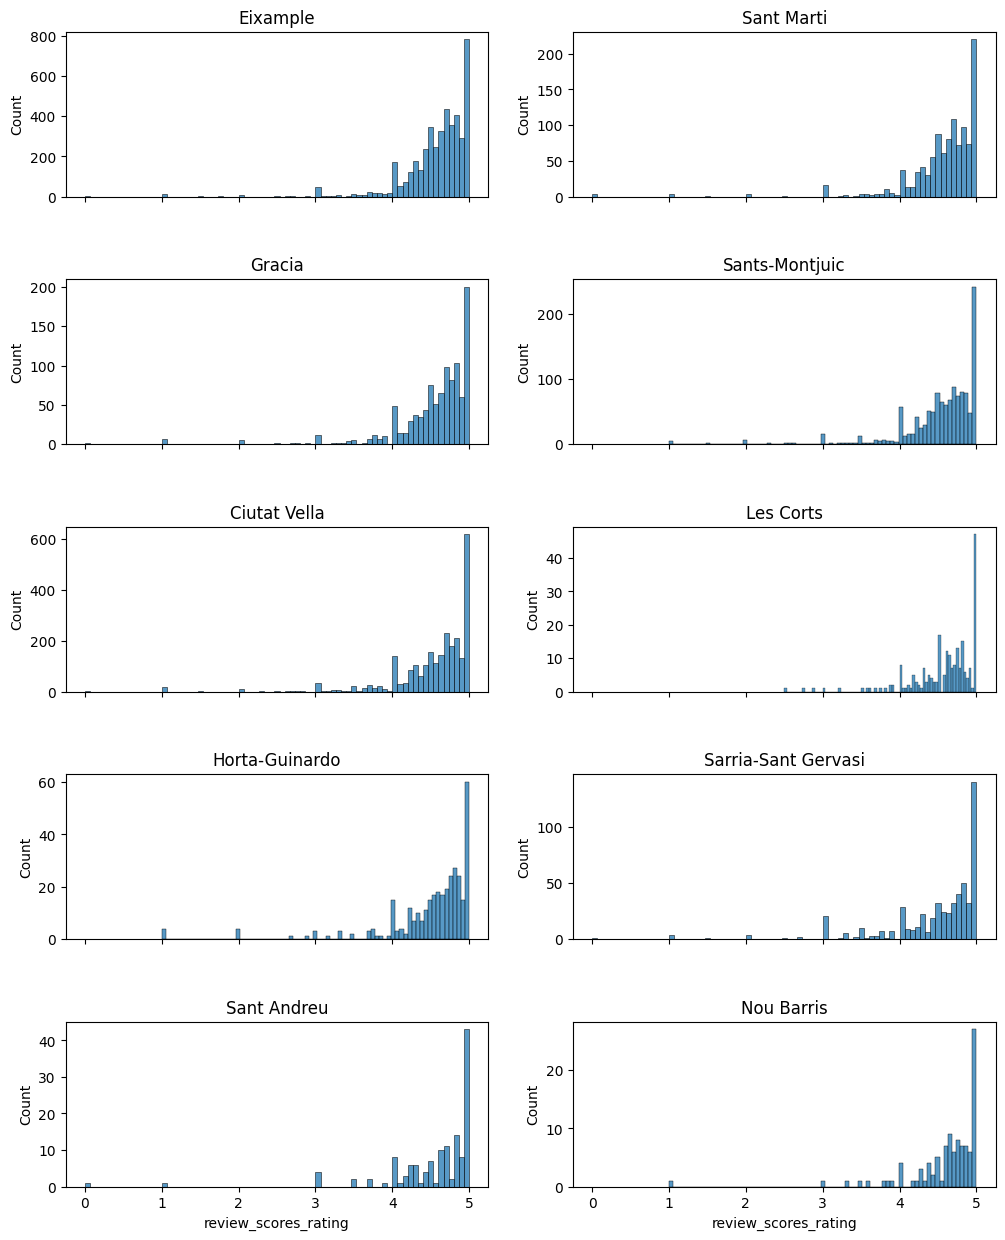

In [96]:
# Histograms of ratings by neighbourhood

plot_histograms(df=data_filtered, col_filter='neighbourhood_group_cleansed', col_plot='review_scores_rating', categories=neighbourhoods, sharex=True)

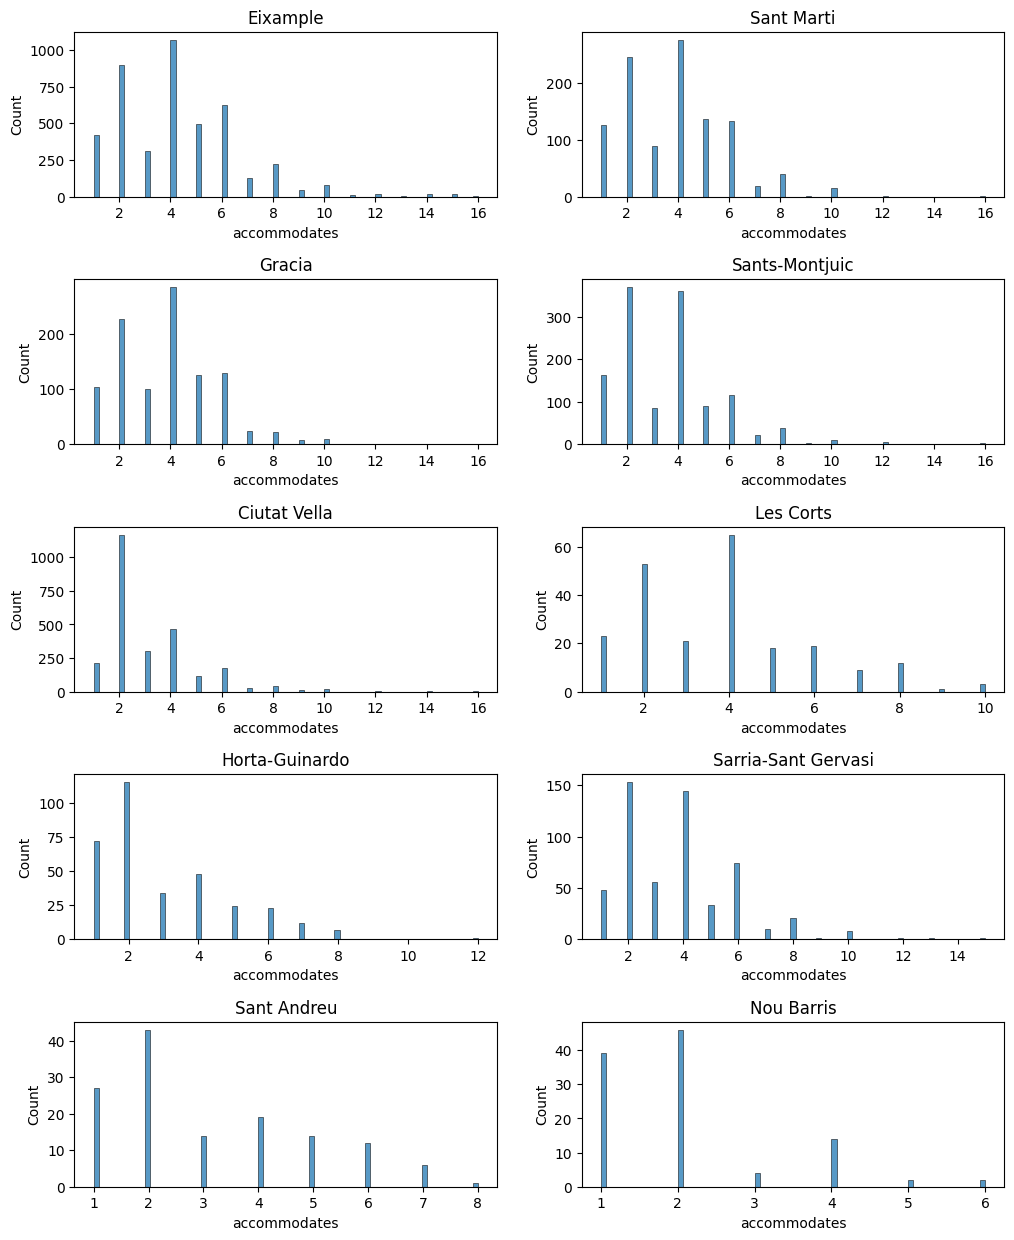

In [97]:
# Histograms of accommodates by neighbourhood

plot_histograms(df=data_filtered, col_filter='neighbourhood_group_cleansed', col_plot='accommodates', categories=neighbourhoods)

#### Room type centered analysis

In [98]:
roomtype_pivot = round(pd.pivot_table(data_filtered, index='room_type', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

roomtype_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

roomtype_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
room_type,,,,,,,
Entire home/apt,8095,999.00,183.33,10.00,5.00,4.55,0.00
Hotel room,94,726.00,208.15,22.00,5.00,4.62,1.00
Private room,3370,999.00,85.47,9.00,5.00,4.57,0.00
Shared room,105,985.00,107.83,15.00,5.00,4.51,3.00


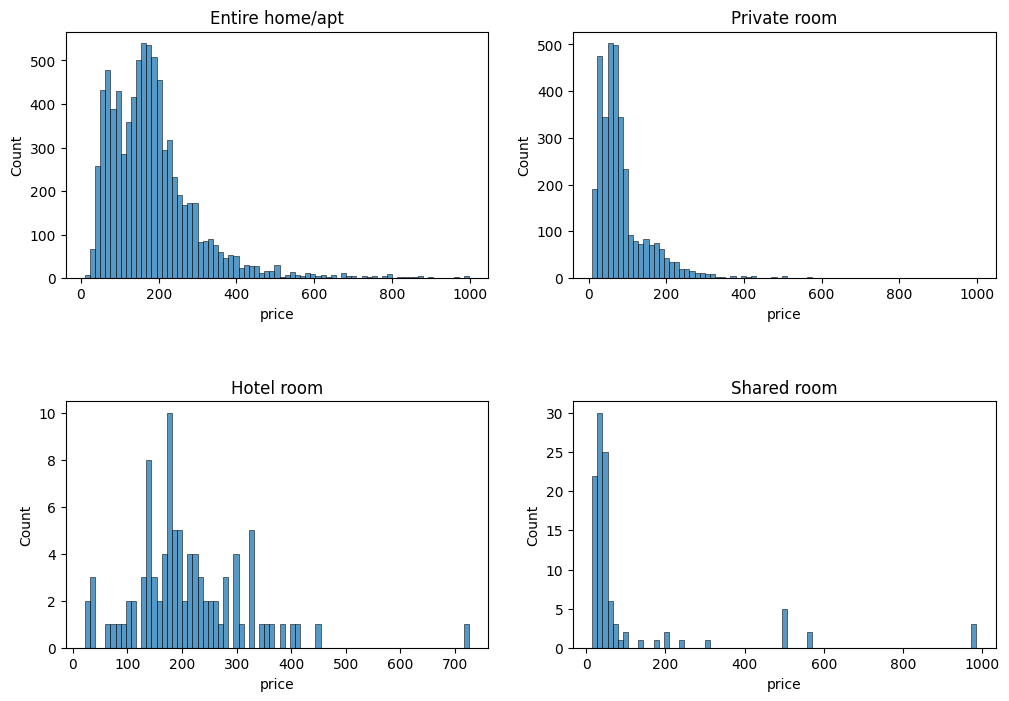

In [99]:
# Histograms of the price by neighbourhood

room_types = [x for x in data_filtered['room_type'].unique()]

plot_histograms(df=data_filtered, col_filter='room_type', col_plot='price', categories=room_types, figsize=(12, 8))

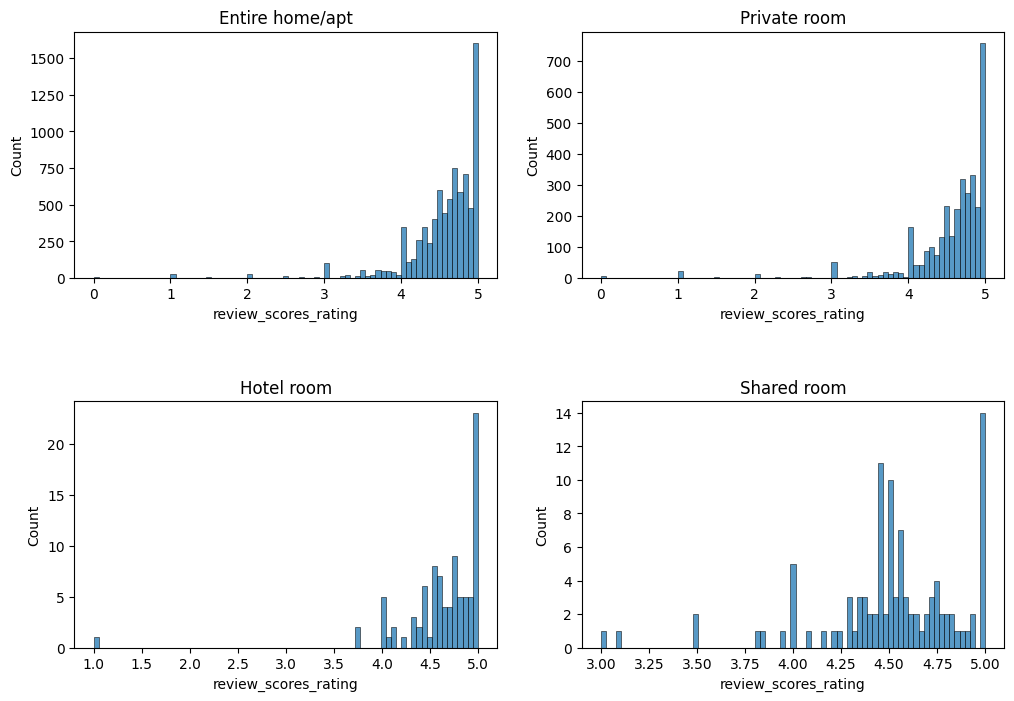

In [100]:
plot_histograms(df=data_filtered, col_filter='room_type', col_plot='review_scores_rating', categories=room_types, figsize=(12, 8))

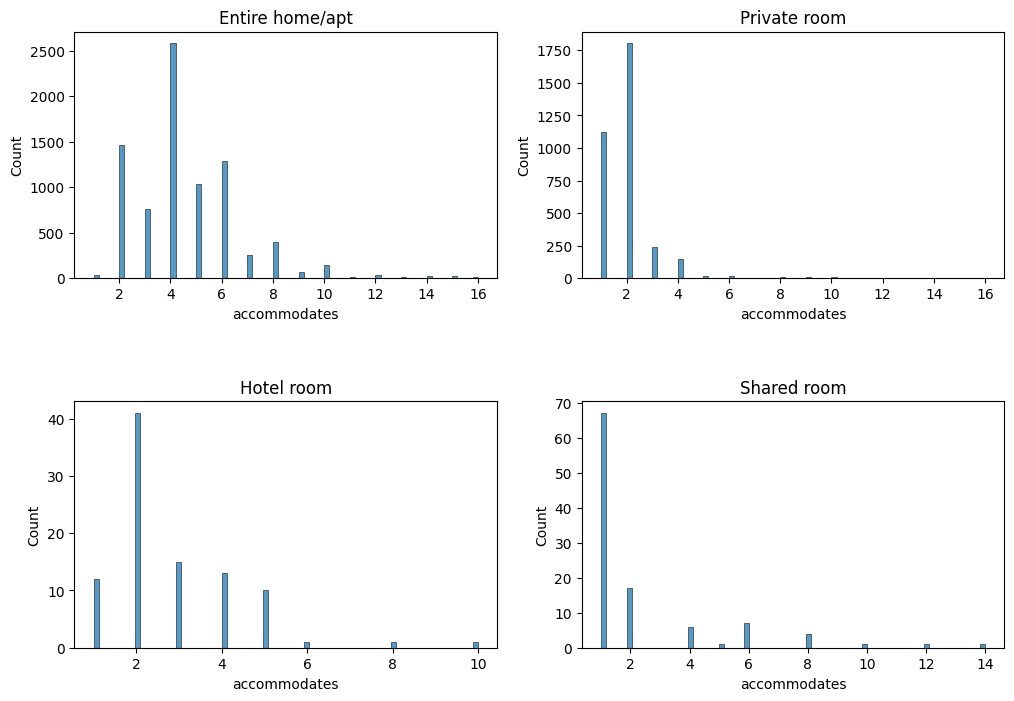

In [101]:
# Histograms of accommodates by room_type

plot_histograms(df=data_filtered, col_filter='room_type', col_plot='accommodates', categories=room_types, figsize=(12, 8))

#### Host type centered analysis

In [102]:
superhost_pivot = round(pd.pivot_table(data_filtered, index='host_is_superhost', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

superhost_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

superhost_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
host_is_superhost,,,,,,,
f,8835,999.00,151.24,9.00,5.00,4.47,0.00
t,2829,999.00,165.01,13.00,5.00,4.83,1.00


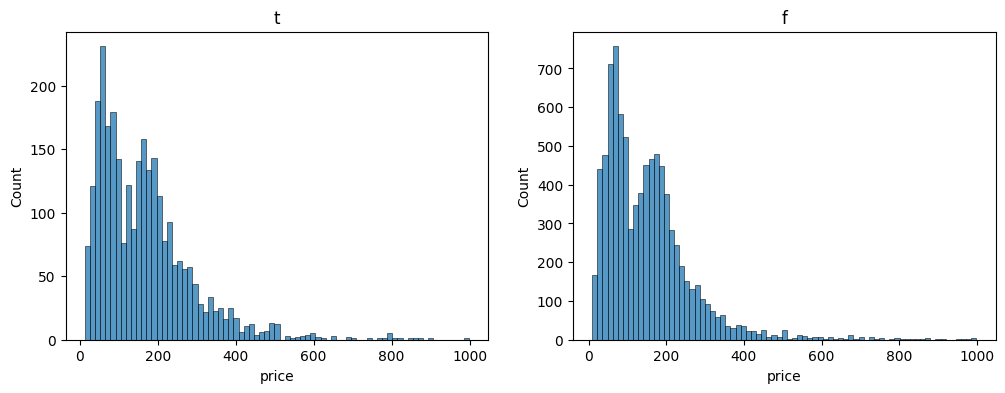

In [103]:
host_types = ['t', 'f']

plot_histograms(df=data_filtered, col_filter='host_is_superhost', col_plot='price', categories=host_types, figsize=(12, 4))

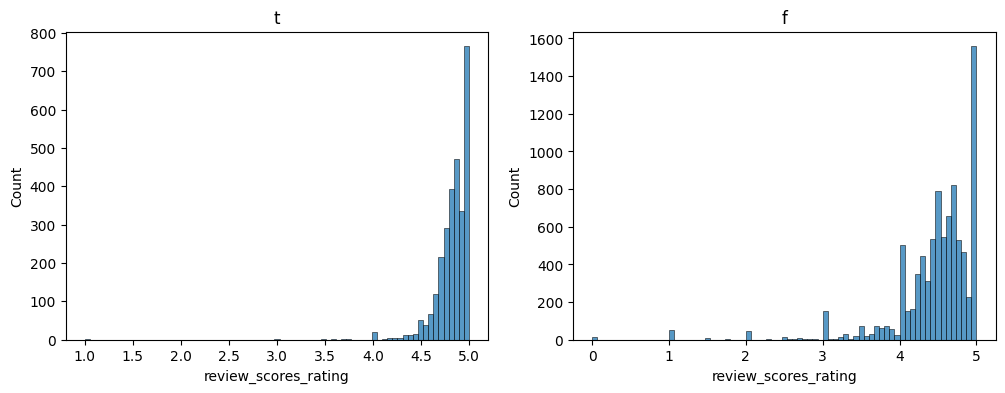

In [104]:
plot_histograms(df=data_filtered, col_filter='host_is_superhost', col_plot='review_scores_rating', categories=host_types, figsize=(12, 4))

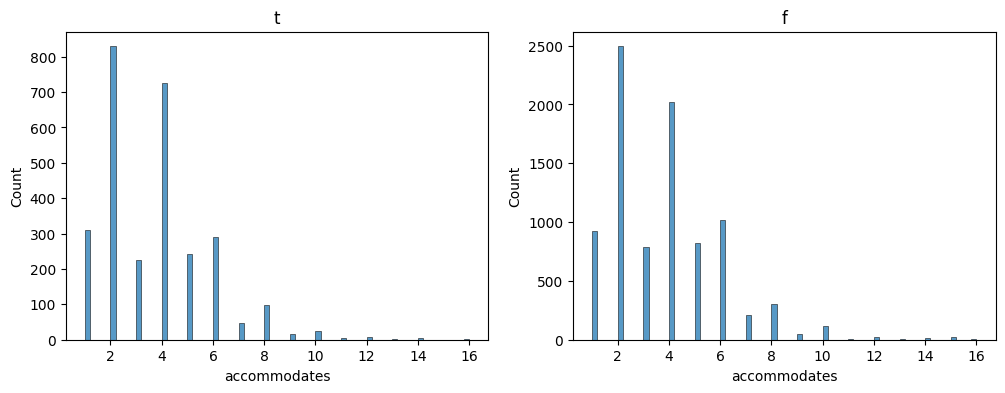

In [105]:
plot_histograms(df=data_filtered, col_filter='host_is_superhost', col_plot='accommodates', categories=host_types, figsize=(12, 4))

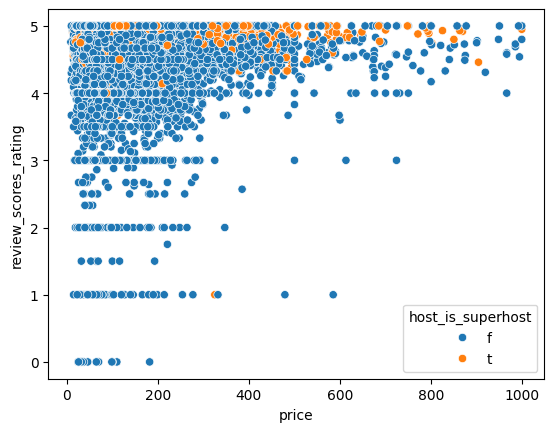

In [106]:
# Scatterplot of several variables with price to look at possible linear correlation

sns.scatterplot(data=data_filtered, x='price', y='review_scores_rating', hue='host_is_superhost')
plt.show()

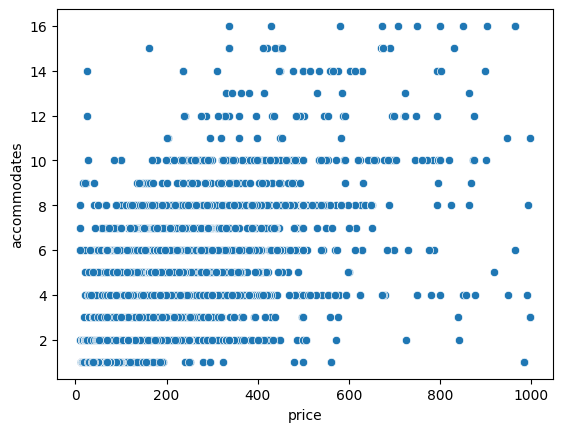

In [107]:
# Scatterplot of several variables with price to look at possible linear correlation

sns.scatterplot(data=data_filtered, x='price', y='accommodates')
plt.show()

#### How long, on average, takes hosts to receive its first review?

In [108]:
# How long does it take to get a first review

date_diff = data['first_review'] - data['host_since']
mean_date_diff = date_diff.mean().days

mean_date_diff_years = round(mean_date_diff / 365.25, 2)
print(f'On average, it takes {mean_date_diff_years} years for a host to receive his/her first review.')

On average, it takes 3.63 years for a host to receive his/her first review.


In [109]:
# Splitting dataframe into numerical and categorical columns

data_num = data_filtered.select_dtypes(include='number')
data_cat = data_filtered.select_dtypes(include='object')

In [110]:
# Defining function to create histograms of all the numerical columns

def make_histograms(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates histograms for all the columns.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols
        sns.histplot(x=df[col], data=df, ax=axes[row_idx, col_idx]) 
        axes[row_idx, col_idx].set_title(col)

    plt.show()

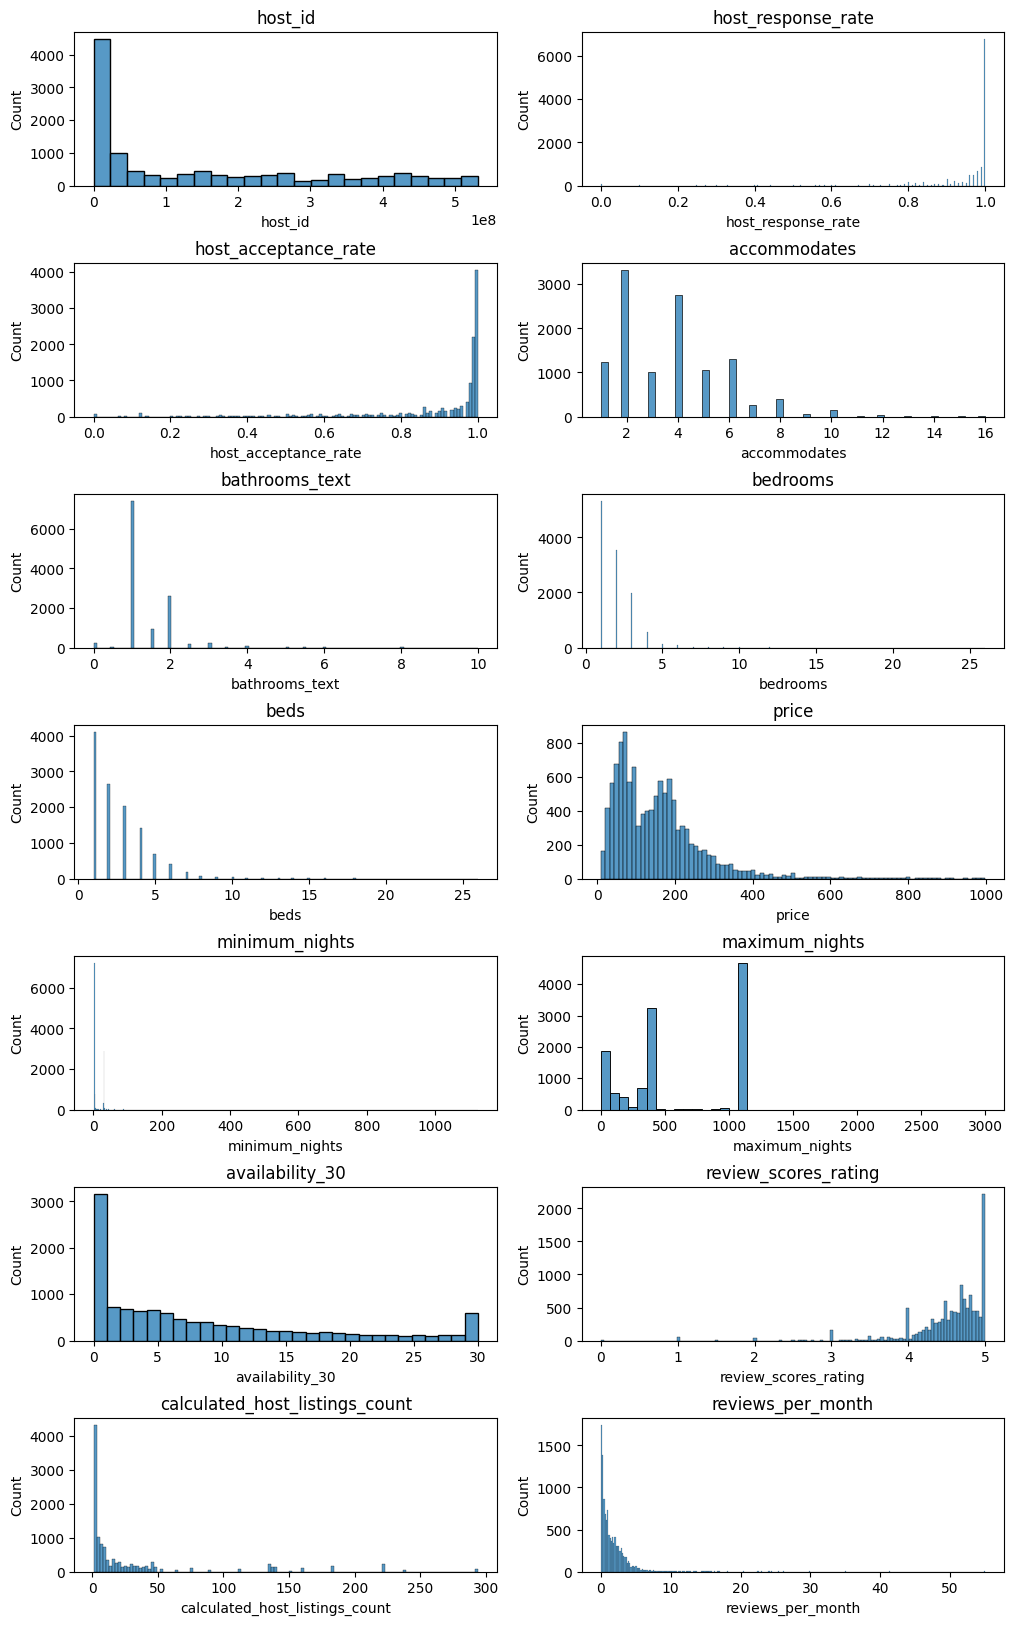

In [111]:
make_histograms(data_num, figsize=(12, 20))

In [112]:
# Calculating skewness of numerical columns

print('Skewness of columns in data_num:\n')

for col in data_num.columns:
    if st.skew(data_num[col]) > 2 or st.skew(data_num[col]) < -2:
        print(f'{col}: {round(st.skew(data_num[col]), 2)} -> HIGH SKEWNESS!')
    else:
        print(f'{col}: {round(st.skew(data_num[col]), 2)}')

Skewness of columns in data_num:

host_id: 0.82
host_response_rate: -4.74 -> HIGH SKEWNESS!
host_acceptance_rate: -2.95 -> HIGH SKEWNESS!
accommodates: 1.31
bathrooms_text: 2.59 -> HIGH SKEWNESS!
bedrooms: 2.84 -> HIGH SKEWNESS!
beds: 2.23 -> HIGH SKEWNESS!
price: 2.15 -> HIGH SKEWNESS!
minimum_nights: 20.88 -> HIGH SKEWNESS!
maximum_nights: 0.19
availability_30: 1.08
review_scores_rating: -3.35 -> HIGH SKEWNESS!
calculated_host_listings_count: 2.76 -> HIGH SKEWNESS!
reviews_per_month: 5.82 -> HIGH SKEWNESS!


In [113]:
# Main summary statistics of the numerical variables

round(data_num.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
host_id,11664.00,151709475.76,168734089.13,10704.00,6299958.00,63229593.00,270258032.00,531957009.00
host_response_rate,11664.00,0.95,0.12,0.00,0.97,1.00,1.00,1.00
host_acceptance_rate,11664.00,0.91,0.17,0.00,0.91,0.99,1.00,1.00
accommodates,11664.00,3.73,2.19,1.00,2.00,4.00,5.00,16.00
bathrooms_text,11664.00,1.34,0.65,0.00,1.00,1.00,2.00,10.00
bedrooms,11664.00,1.89,1.11,1.00,1.00,2.00,2.00,26.00
beds,11664.00,2.60,1.85,1.00,1.00,2.00,3.00,26.00
price,11664.00,154.58,116.18,9.00,70.00,135.00,200.00,999.00
minimum_nights,11664.00,11.89,23.17,1.00,1.00,3.00,31.00,1125.00
maximum_nights,11664.00,599.52,450.58,1.00,299.75,365.00,1125.00,3000.00


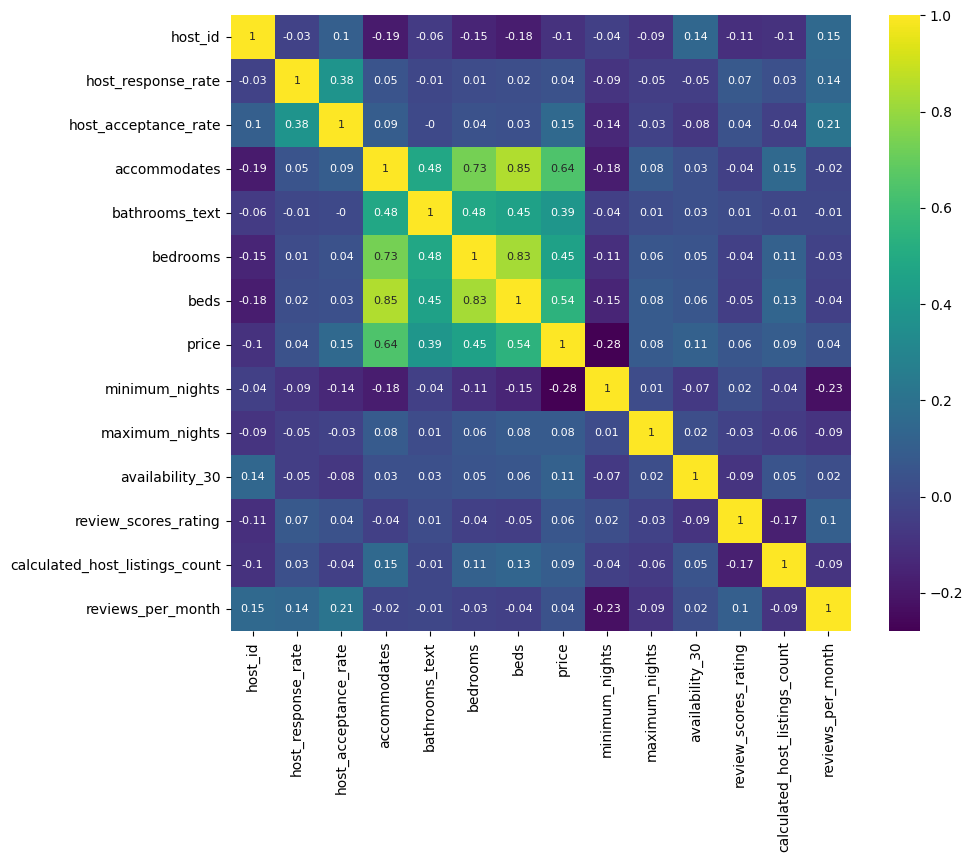

In [114]:
# Correlation matrix

corr_matrix = round(data_num.corr(), 2)

plt.figure(figsize=(10,8))

corr_matrix_display = sns.heatmap(corr_matrix, cmap='viridis', annot=True, annot_kws={"size": 8})

In [115]:
# Main summary statistics of the categorical variables

data_cat.describe().T

,count,unique,top,freq
host_response_time,11664,4,within an hour,8957
host_is_superhost,11664,2,f,8835
host_has_profile_pic,11664,2,t,11540
host_identity_verified,11664,2,t,11383
neighbourhood_group_cleansed,11664,10,Eixample,4374
room_type,11664,4,Entire home/apt,8095
has_availability,11664,2,t,11619
instant_bookable,11664,2,f,6364


In [116]:
# Defining function to plot countplots

def make_countplots(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates countplots for all the columns.
    If the column has more than 5 categories, the data goes in the y axis.
    Bars are arranged in descending order based on count.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols

        if df[col].nunique() > 5:
            order = df[col].value_counts().index
            sns.countplot(y=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)
        else:
            order = df[col].value_counts().index
            sns.countplot(x=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)

        axes[row_idx, col_idx].set_title(col)
        axes[row_idx, col_idx].set_xlabel('Count' if df[col].nunique() <= 5 else 'Frequency')
        axes[row_idx, col_idx].set_ylabel('Categories' if df[col].nunique() > 5 else 'Count')

    plt.show()

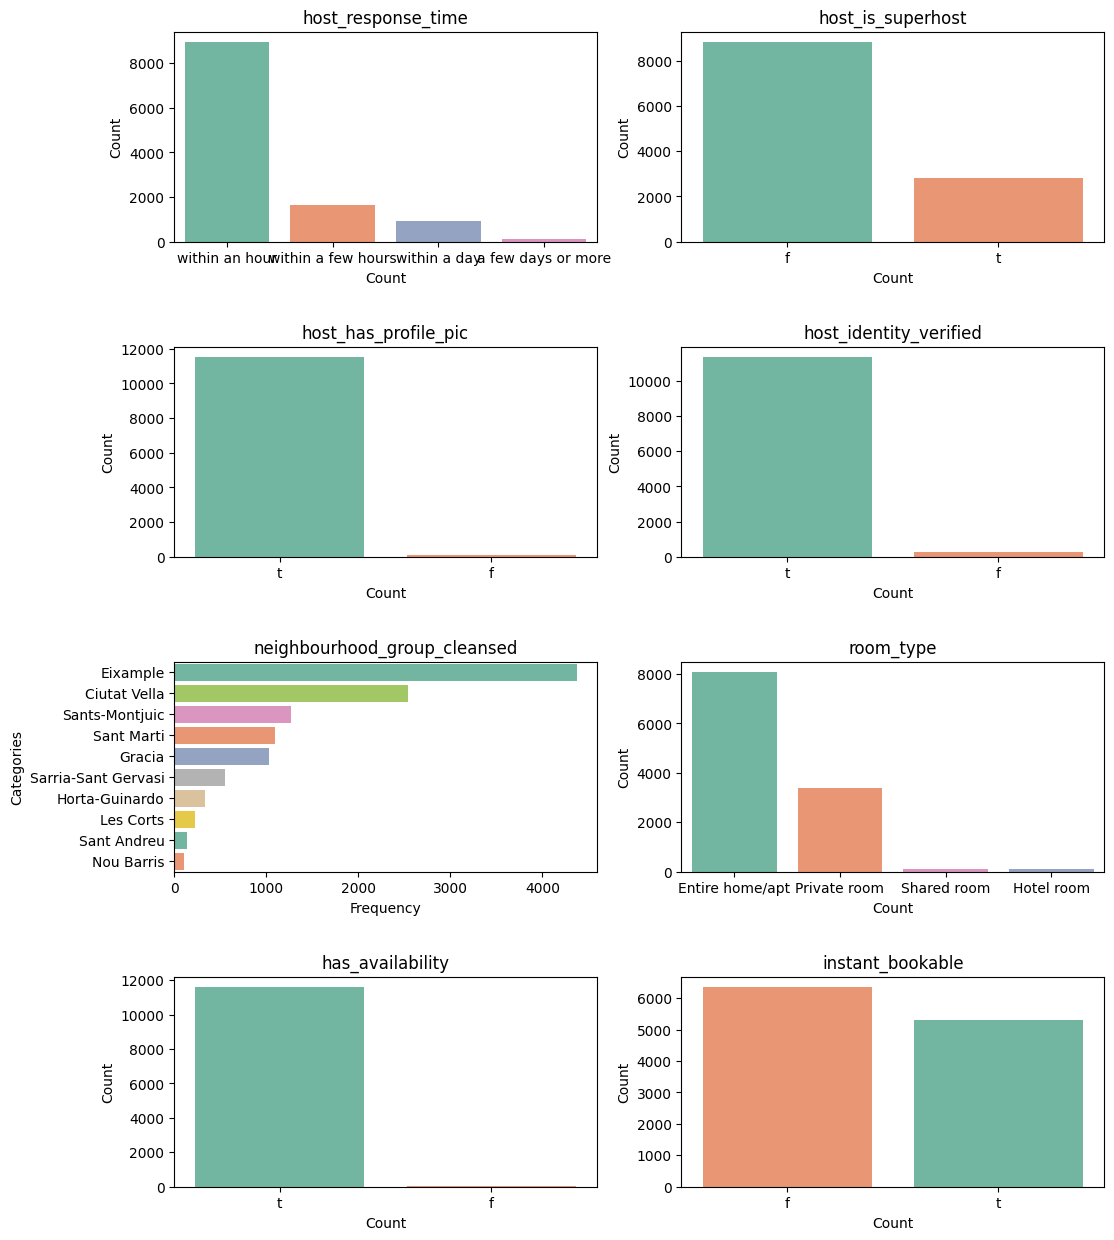

In [117]:
# Creating countplots for the categorical columns

make_countplots(data_cat)

## 4. Hypothesis testing

#### placeholder for business question 1

#### placeholder for business question 2

#### placeholder for business question 3

## 5. Data preprocessing

## 6. Predicting the price of listings